Tôi sẽ viết lại markdown mà không sử dụng các ký tự đặc biệt để tránh lỗi:

# Công thức Black-Scholes cho Quyền chọn Châu Âu

## 1. Công thức tính giá quyền chọn

### Quyền chọn mua (Call Option):
$C = S * N(d1) - K * e^(-rT) * N(d2)$

### Quyền chọn bán (Put Option):
$P = K * e^(-rT) * N(-d2) - S * N(-d1)$

Trong đó:
- S: Giá hiện tại của tài sản cơ sở
- K: Giá thực hiện (Strike price)
- T: Thời gian đến khi đáo hạn (năm)
- r: Lãi suất phi rủi ro
- sigma: Độ biến động (volatility)
- N(x): Hàm phân phối tích lũy của phân phối chuẩn chuẩn hóa

### Các tham số d1 và d2:
$d1 = (ln(S/K) + (r + 0.5 * sigma^2) * T) / (sigma * sqrt(T))$

$d2 = d1 - sigma * sqrt(T)$

## 2. Phương trình vi phân ngẫu nhiên (SDE)

### Mô hình Black-Scholes cho giá tài sản:
dSt = mu * St * dt + sigma * St * dWt

Trong đó:
- St: Giá tài sản tại thời điểm t
- mu: Tỷ suất sinh lợi kỳ vọng
- sigma: Độ biến động
- Wt: Chuyển động Brown chuẩn
- dt: Vi phân thời gian
- dWt: Vi phân của chuyển động Brown

### Giải pháp của SDE:
St = S0 * exp((mu - 0.5 * sigma^2) * t + sigma * Wt)

Trong đó:
- S0: Giá tài sản ban đầu
- t: Thời gian

## Lưu ý quan trọng:
1. Mô hình Black-Scholes giả định:
   - Thị trường hoàn hảo
   - Không có chi phí giao dịch
   - Lãi suất phi rủi ro không đổi
   - Độ biến động không đổi
   - Giá tài sản tuân theo phân phối log-normal

2. SDE mô tả quá trình ngẫu nhiên của giá tài sản, trong đó:
   - Phần mu * St * dt đại diện cho xu hướng
   - Phần sigma * St * dWt đại diện cho yếu tố ngẫu nhiên


Black-Scholes Call Price: 10.4506
Monte Carlo Call Price: 10.3830
Black-Scholes Put Price: 5.5735
Monte Carlo Put Price: 5.4373


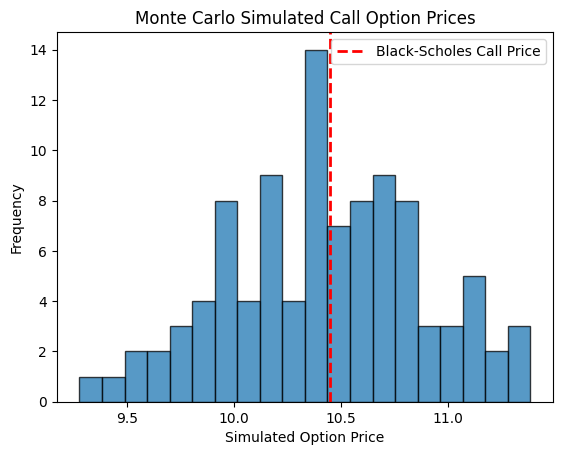

In [1]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

# Black-Scholes Theoretical Formula
# The Black-Scholes formula for a European call/put option is given by:
# Call: C = S * N(d1) - K * exp(-rT) * N(d2)
# Put: P = K * exp(-rT) * N(-d2) - S * N(-d1)
# where d1 and d2 are defined as:
# d1 = (ln(S/K) + (r + 0.5 * sigma^2) * T) / (sigma * sqrt(T))
# d2 = d1 - sigma * sqrt(T)

def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    elif option_type == "put":
        price = K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)
    else:
        raise ValueError("Option type must be 'call' or 'put'")
    
    return price

# Monte Carlo Simulation for Option Pricing
# The Monte Carlo method estimates the expected payoff of the option by simulating
# multiple possible paths for the underlying asset's price at expiration.
def monte_carlo_option_pricing(S, K, T, r, sigma, N=10000, option_type="call"):
    dt = T  # Single-step model
    Z = np.random.randn(N)  # Generate standard normal random variables
    S_T = S * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)  # Simulated stock price at expiration
    
    if option_type == "call":
        payoffs = np.maximum(S_T - K, 0)  # Call option payoff
    elif option_type == "put":
        payoffs = np.maximum(K - S_T, 0)  # Put option payoff
    else:
        raise ValueError("Option type must be 'call' or 'put'")
    
    price = np.exp(-r * T) * np.mean(payoffs)  # Discounted expected payoff
    return price

# Parameters
S = 100    # Current stock price
K = 100    # Strike price
T = 1      # Time to maturity (in years)
r = 0.05   # Risk-free rate
sigma = 0.2 # Volatility

# Compute prices
bs_call_price = black_scholes(S, K, T, r, sigma, "call")
mc_call_price = monte_carlo_option_pricing(S, K, T, r, sigma, option_type="call")
bs_put_price = black_scholes(S, K, T, r, sigma, "put")
mc_put_price = monte_carlo_option_pricing(S, K, T, r, sigma, option_type="put")

# Display results
print(f"Black-Scholes Call Price: {bs_call_price:.4f}")
print(f"Monte Carlo Call Price: {mc_call_price:.4f}")
print(f"Black-Scholes Put Price: {bs_put_price:.4f}")
print(f"Monte Carlo Put Price: {mc_put_price:.4f}")

# Visualization of Monte Carlo Simulation Results
mc_prices = [monte_carlo_option_pricing(S, K, T, r, sigma, N=1000) for _ in range(100)]
plt.hist(mc_prices, bins=20, alpha=0.75, edgecolor='black')
plt.axvline(bs_call_price, color='r', linestyle='dashed', linewidth=2, label='Black-Scholes Call Price')
plt.xlabel("Simulated Option Price")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulated Call Option Prices")
plt.legend()
plt.show()


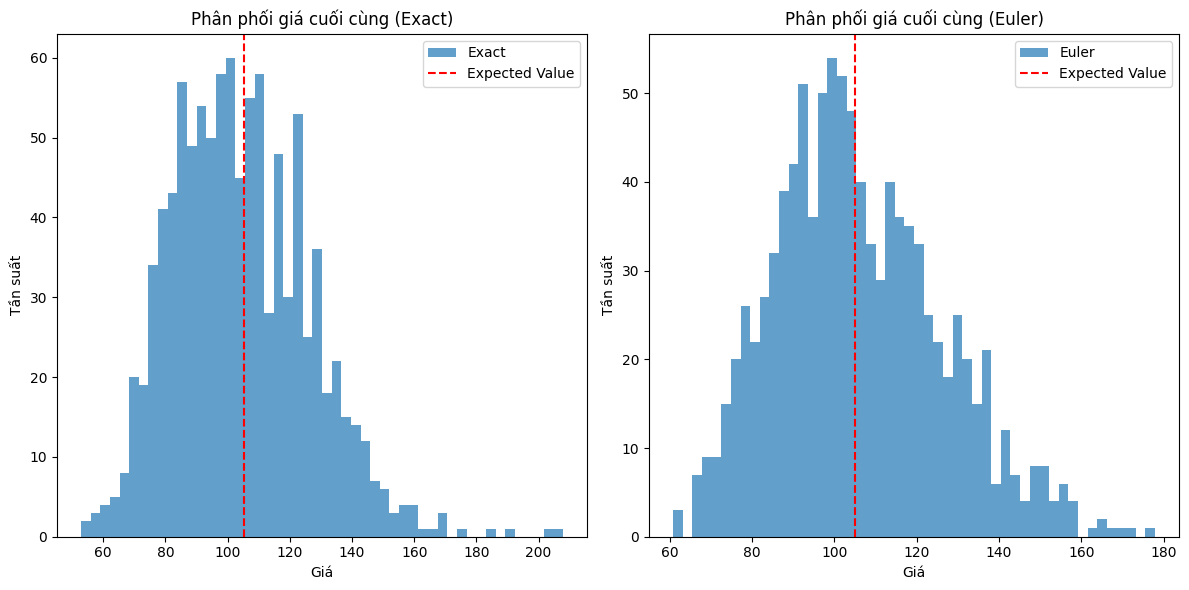

Thống kê mô phỏng (Exact):
Giá trị trung bình: 104.27
Độ lệch chuẩn: 21.87

Thống kê mô phỏng (Euler):
Giá trị trung bình: 105.90
Độ lệch chuẩn: 20.34


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def bs_simulate(S0, mu, sigma, T, N_simulations, N_steps, method='exact'):
    """
    Mô phỏng mô hình Black-Scholes sử dụng Euler-Maruyama hoặc công thức log-normal chính xác
    
    Tham số:
    S0: float - Giá ban đầu của tài sản
    mu: float - Tỷ suất sinh lợi kỳ vọng
    sigma: float - Độ biến động
    T: float - Thời gian mô phỏng (năm)
    N_simulations: int - Số lượng đường mô phỏng
    N_steps: int - Số bước thời gian
    method: str - 'exact' hoặc 'euler'
    
    Trả về:
    S_T: array - Giá cuối cùng của tài sản cho mỗi đường mô phỏng
    """
    
    # Tính toán các tham số
    dt = T / N_steps
    t = np.linspace(0, T, N_steps + 1)
    
    if method == 'exact':
        # Sử dụng công thức log-normal chính xác
        Z = np.random.randn(N_simulations)
        S_T = S0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
        
    elif method == 'euler':
        # Sử dụng phương pháp Euler-Maruyama
        S = np.zeros((N_simulations, N_steps + 1))
        S[:, 0] = S0
        
        for i in range(N_steps):
            dW = np.random.randn(N_simulations) * np.sqrt(dt)
            S[:, i+1] = S[:, i] * (1 + mu * dt + sigma * dW)
        
        S_T = S[:, -1]
    
    else:
        raise ValueError("Method phải là 'exact' hoặc 'euler'")
    
    return S_T

# Ví dụ sử dụng
if __name__ == "__main__":
    # Tham số mô phỏng
    S0 = 100      # Giá ban đầu
    mu = 0.05     # Tỷ suất sinh lợi kỳ vọng
    sigma = 0.2   # Độ biến động
    T = 1         # Thời gian mô phỏng (1 năm)
    N_simulations = 1000  # Số lượng đường mô phỏng
    N_steps = 252        # Số bước thời gian (252 ngày giao dịch)
     
    
    # Mô phỏng sử dụng cả hai phương pháp
    S_T_exact = bs_simulate(S0, mu, sigma, T, N_simulations, N_steps, method='exact')
    S_T_euler = bs_simulate(S0, mu, sigma, T, N_simulations, N_steps, method='euler')
    
    # Vẽ biểu đồ phân phối giá cuối cùng
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(S_T_exact, bins=50, alpha=0.7, label='Exact')
    plt.axvline(S0 * np.exp(mu * T), color='r', linestyle='--', label='Expected Value')
    plt.title('Phân phối giá cuối cùng (Exact)')
    plt.xlabel('Giá')
    plt.ylabel('Tần suất')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(S_T_euler, bins=50, alpha=0.7, label='Euler')
    plt.axvline(S0 * np.exp(mu * T), color='r', linestyle='--', label='Expected Value')
    plt.title('Phân phối giá cuối cùng (Euler)')
    plt.xlabel('Giá')
    plt.ylabel('Tần suất')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # In thống kê
    print(f"Thống kê mô phỏng (Exact):")
    print(f"Giá trị trung bình: {np.mean(S_T_exact):.2f}")
    print(f"Độ lệch chuẩn: {np.std(S_T_exact):.2f}")
    print(f"\nThống kê mô phỏng (Euler):")
    print(f"Giá trị trung bình: {np.mean(S_T_euler):.2f}")
    print(f"Độ lệch chuẩn: {np.std(S_T_euler):.2f}")

Giá Black-Scholes lý thuyết: 10.4506

Kết quả mô phỏng:
Shift | Giá quyền chọn | Sai số chuẩn | Sai số tương đối
------------------------------------------------------------
  0.0 |        10.7261 |       0.1509 |         2.6363%
  0.5 |        10.4892 |       0.0807 |         0.3691%
  1.0 |        10.4466 |       0.0494 |         0.0383%
  1.5 |        10.3935 |       0.0591 |         0.5463%
  2.0 |        10.5492 |       0.1034 |         0.9437%


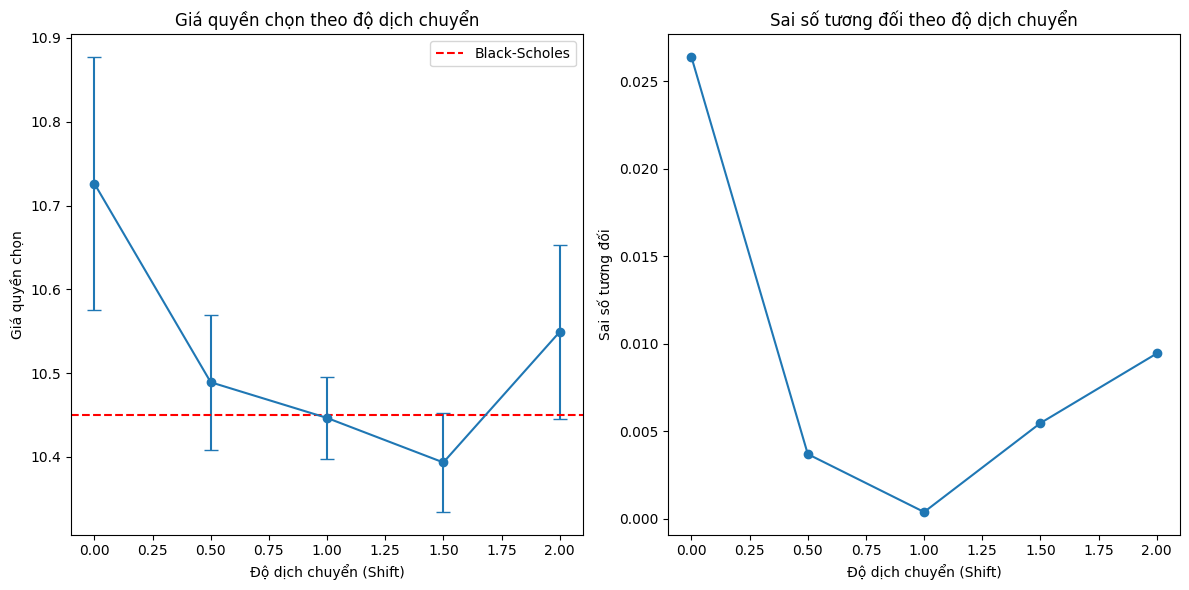

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def bs_importance_sampling(S0, K, r, sigma, T, N_simulations, shift_mean=0):
    """
    Mô phỏng Black-Scholes với Importance Sampling
    
    Tham số:
    S0: float - Giá ban đầu của tài sản
    K: float - Giá thực hiện
    r: float - Lãi suất phi rủi ro
    sigma: float - Độ biến động
    T: float - Thời gian đến đáo hạn
    N_simulations: int - Số lượng mô phỏng
    shift_mean: float - Độ dịch chuyển của phân phối Gaussian
    
    Trả về:
    option_price: float - Giá quyền chọn
    standard_error: float - Sai số chuẩn
    """
    
    # Tính toán các tham số
    drift = (r - 0.5 * sigma**2) * T
    vol = sigma * np.sqrt(T)
    
    # Tạo các biến ngẫu nhiên với phân phối dịch chuyển
    Z = np.random.randn(N_simulations) + shift_mean
    
    # Tính giá tài sản tại thời điểm T
    S_T = S0 * np.exp(drift + vol * Z)
    
    # Tính payoff của quyền chọn mua
    payoffs = np.maximum(S_T - K, 0)
    
    # Tính likelihood ratio (tỷ số khả năng)
    # Likelihood ratio = exp(-shift_mean * Z + 0.5 * shift_mean^2)
    likelihood_ratio = np.exp(-shift_mean * Z + 0.5 * shift_mean**2)
    
    # Tính giá quyền chọn với trọng số
    discounted_payoffs = np.exp(-r * T) * payoffs * likelihood_ratio
    
    # Tính giá quyền chọn và sai số
    option_price = np.mean(discounted_payoffs)
    standard_error = np.std(discounted_payoffs) / np.sqrt(N_simulations)
    
    return option_price, standard_error

def compare_sampling_methods(S0, K, r, sigma, T, N_simulations):
    """
    So sánh các phương pháp lấy mẫu khác nhau
    """
    # Tính giá Black-Scholes lý thuyết
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    bs_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    # Mô phỏng với các độ dịch chuyển khác nhau
    shifts = [0, 0.5, 1.0, 1.5, 2.0]
    results = []
    
    for shift in shifts:
        price, error = bs_importance_sampling(S0, K, r, sigma, T, N_simulations, shift)
        results.append({
            'shift': shift,
            'price': price,
            'error': error,
            'relative_error': abs(price - bs_price) / bs_price
        })
    
    return results, bs_price

# Ví dụ sử dụng
if __name__ == "__main__":
    # Tham số
    S0 = 100      # Giá ban đầu
    K = 100       # Giá thực hiện
    r = 0.05      # Lãi suất phi rủi ro
    sigma = 0.2   # Độ biến động
    T = 1         # Thời gian đến đáo hạn
    N_simulations = 10000  # Số lượng mô phỏng
    
    # So sánh các phương pháp
    results, bs_price = compare_sampling_methods(S0, K, r, sigma, T, N_simulations)
    
    # In kết quả
    print(f"Giá Black-Scholes lý thuyết: {bs_price:.4f}")
    print("\nKết quả mô phỏng:")
    print("Shift | Giá quyền chọn | Sai số chuẩn | Sai số tương đối")
    print("-" * 60)
    
    for r in results:
        print(f"{r['shift']:5.1f} | {r['price']:14.4f} | {r['error']:12.4f} | {r['relative_error']:15.4%}")
    
    # Vẽ biểu đồ so sánh
    shifts = [r['shift'] for r in results]
    prices = [r['price'] for r in results]
    errors = [r['error'] for r in results]
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.errorbar(shifts, prices, yerr=errors, fmt='o-', capsize=5)
    plt.axhline(y=bs_price, color='r', linestyle='--', label='Black-Scholes')
    plt.xlabel('Độ dịch chuyển (Shift)')
    plt.ylabel('Giá quyền chọn')
    plt.title('Giá quyền chọn theo độ dịch chuyển')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(shifts, [r['relative_error'] for r in results], 'o-')
    plt.xlabel('Độ dịch chuyển (Shift)')
    plt.ylabel('Sai số tương đối')
    plt.title('Sai số tương đối theo độ dịch chuyển')
    
    plt.tight_layout()
    plt.show()

Kết quả so sánh các phương pháp mô phỏng
Giá Black-Scholes lý thuyết: 10.4506

Monte Carlo thông thường:
Giá quyền chọn: 10.2774
Sai số chuẩn: 0.1534
Thời gian thực hiện: 0.0010 giây

Importance Sampling:
Shift | Giá quyền chọn | Sai số chuẩn | Sai số tương đối
------------------------------------------------------------
  0.0 |        10.6100 |       0.1475 |         1.5258%
  0.5 |        10.5224 |       0.0808 |         0.6869%
  1.0 |        10.5579 |       0.0491 |         1.0270%
  1.5 |        10.4444 |       0.0592 |         0.0591%
  2.0 |        10.3553 |       0.1022 |         0.9121%

Thời gian thực hiện IS: 0.0029 giây


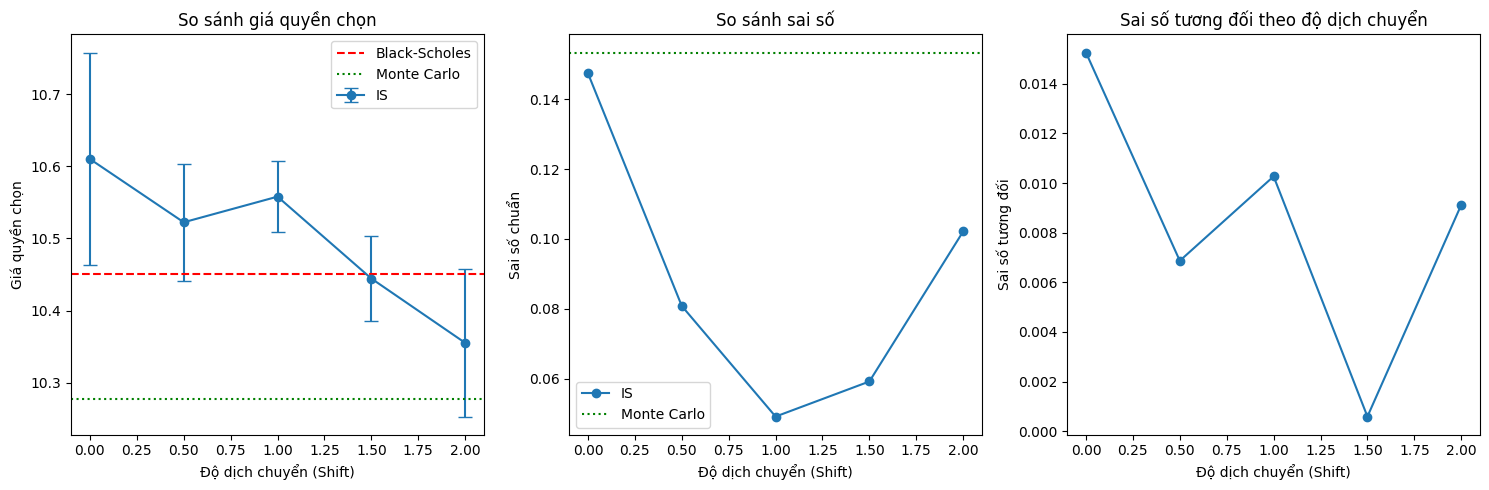


Phân tích hiệu quả:
Độ dịch chuyển tối ưu: 1.0
Cải thiện sai số so với MC: 68.00%
Cải thiện thời gian so với MC: -196.37%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

def black_scholes(S0, K, T, r, sigma, option_type="call"):
    """Tính giá quyền chọn theo công thức Black-Scholes"""
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    
    return price

def monte_carlo_bs(S0, K, T, r, sigma, N_simulations, option_type="call"):
    """Mô phỏng Monte Carlo thông thường"""
    Z = np.random.randn(N_simulations)
    S_T = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    
    if option_type == "call":
        payoffs = np.maximum(S_T - K, 0)
    else:
        payoffs = np.maximum(K - S_T, 0)
    
    price = np.exp(-r * T) * np.mean(payoffs)
    std_error = np.std(payoffs) / np.sqrt(N_simulations)
    
    return price, std_error

def importance_sampling_bs(S0, K, T, r, sigma, N_simulations, shift_mean, option_type="call"):
    """Mô phỏng với Importance Sampling"""
    Z = np.random.randn(N_simulations) + shift_mean
    S_T = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    
    if option_type == "call":
        payoffs = np.maximum(S_T - K, 0)
    else:
        payoffs = np.maximum(K - S_T, 0)
    
    # Tính likelihood ratio
    likelihood_ratio = np.exp(-shift_mean * Z + 0.5 * shift_mean**2)
    
    # Tính giá với trọng số
    weighted_payoffs = np.exp(-r * T) * payoffs * likelihood_ratio
    price = np.mean(weighted_payoffs)
    std_error = np.std(weighted_payoffs) / np.sqrt(N_simulations)
    
    return price, std_error

def compare_methods(S0, K, T, r, sigma, N_simulations, option_type="call"):
    """So sánh các phương pháp mô phỏng"""
    # Tính giá Black-Scholes lý thuyết
    bs_price = black_scholes(S0, K, T, r, sigma, option_type)
    
    # Thời gian bắt đầu
    start_time = time.time()
    
    # Mô phỏng Monte Carlo thông thường
    mc_price, mc_error = monte_carlo_bs(S0, K, T, r, sigma, N_simulations, option_type)
    mc_time = time.time() - start_time
    
    # Thời gian bắt đầu cho IS
    start_time = time.time()
    
    # Mô phỏng với các độ dịch chuyển khác nhau
    shifts = [0, 0.5, 1.0, 1.5, 2.0]
    is_results = []
    
    for shift in shifts:
        is_price, is_error = importance_sampling_bs(S0, K, T, r, sigma, N_simulations, 
                                                  shift, option_type)
        is_results.append({
            'shift': shift,
            'price': is_price,
            'error': is_error,
            'relative_error': abs(is_price - bs_price) / bs_price
        })
    
    is_time = time.time() - start_time
    
    return {
        'bs_price': bs_price,
        'mc_price': mc_price,
        'mc_error': mc_error,
        'mc_time': mc_time,
        'is_results': is_results,
        'is_time': is_time
    }

# Tham số mô phỏng
S0 = 100      # Giá ban đầu
K = 100       # Giá thực hiện
T = 1         # Thời gian đến đáo hạn
r = 0.05      # Lãi suất phi rủi ro
sigma = 0.2   # Độ biến động
N_simulations = 10000  # Số lượng mô phỏng


# Thực hiện so sánh
results = compare_methods(S0, K, T, r, sigma, N_simulations)

# In kết quả
print("Kết quả so sánh các phương pháp mô phỏng")
print("=" * 50)
print(f"Giá Black-Scholes lý thuyết: {results['bs_price']:.4f}")
print(f"\nMonte Carlo thông thường:")
print(f"Giá quyền chọn: {results['mc_price']:.4f}")
print(f"Sai số chuẩn: {results['mc_error']:.4f}")
print(f"Thời gian thực hiện: {results['mc_time']:.4f} giây")
print(f"\nImportance Sampling:")
print("Shift | Giá quyền chọn | Sai số chuẩn | Sai số tương đối")
print("-" * 60)

for r in results['is_results']:
    print(f"{r['shift']:5.1f} | {r['price']:14.4f} | {r['error']:12.4f} | {r['relative_error']:15.4%}")

print(f"\nThời gian thực hiện IS: {results['is_time']:.4f} giây")

# Vẽ biểu đồ so sánh
plt.figure(figsize=(15, 5))

# Biểu đồ 1: So sánh giá quyền chọn
plt.subplot(1, 3, 1)
shifts = [r['shift'] for r in results['is_results']]
prices = [r['price'] for r in results['is_results']]
errors = [r['error'] for r in results['is_results']]

plt.errorbar(shifts, prices, yerr=errors, fmt='o-', capsize=5, label='IS')
plt.axhline(y=results['bs_price'], color='r', linestyle='--', label='Black-Scholes')
plt.axhline(y=results['mc_price'], color='g', linestyle=':', label='Monte Carlo')
plt.xlabel('Độ dịch chuyển (Shift)')
plt.ylabel('Giá quyền chọn')
plt.title('So sánh giá quyền chọn')
plt.legend()

# Biểu đồ 2: So sánh sai số
plt.subplot(1, 3, 2)
plt.plot(shifts, [r['error'] for r in results['is_results']], 'o-', label='IS')
plt.axhline(y=results['mc_error'], color='g', linestyle=':', label='Monte Carlo')
plt.xlabel('Độ dịch chuyển (Shift)')
plt.ylabel('Sai số chuẩn')
plt.title('So sánh sai số')
plt.legend()

# Biểu đồ 3: So sánh sai số tương đối
plt.subplot(1, 3, 3)
plt.plot(shifts, [r['relative_error'] for r in results['is_results']], 'o-')
plt.xlabel('Độ dịch chuyển (Shift)')
plt.ylabel('Sai số tương đối')
plt.title('Sai số tương đối theo độ dịch chuyển')

plt.tight_layout()
plt.show()

# Phân tích hiệu quả
print("\nPhân tích hiệu quả:")
print("=" * 50)
best_is = min(results['is_results'], key=lambda x: x['error'])
print(f"Độ dịch chuyển tối ưu: {best_is['shift']:.1f}")
print(f"Cải thiện sai số so với MC: {(1 - best_is['error']/results['mc_error'])*100:.2f}%")
print(f"Cải thiện thời gian so với MC: {(1 - results['is_time']/results['mc_time'])*100:.2f}%")

In [6]:

import numpy as np

def monte_carlo_option_pricing_IS(S0, K, T, r, sigma, N=10000, option_type="call", shift=0.2):
    """
    Định giá quyền chọn châu Âu bằng phương pháp Monte Carlo + Importance Sampling.

    Tham số:
    - S0: giá tài sản ban đầu
    - K: giá thực hiện
    - T: thời gian đáo hạn
    - r: lãi suất phi rủi ro
    - sigma: độ biến động
    - N: số lượng mô phỏng
    - option_type: "call" hoặc "put"
    - shift: hệ số dịch chuyển phân phối (importance sampling)

    Trả về:
    - Giá quyền chọn ước lượng theo IS
    """
    # Dịch chuyển drift trong phân phối chuẩn (importance sampling)
    Z_tilde = np.random.randn(N) + shift  # Lấy mẫu từ q(x)
    S_T_tilde = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z_tilde)

    # Tính trọng số likelihood ratio: p(Z) / q(Z)
    w = np.exp(-shift * Z_tilde + 0.5 * shift**2)

    # Tính payoff
    if option_type == "call":
        payoff = np.maximum(S_T_tilde - K, 0)
    elif option_type == "put":
        payoff = np.maximum(K - S_T_tilde, 0)
    else:
        raise ValueError("Option type phải là 'call' hoặc 'put'")

    weighted_payoff = payoff * w
    price = np.exp(-r * T) * np.mean(weighted_payoff)
    return price


# Ví dụ sử dụng
if __name__ == "__main__":
    S0 = 100
    K = 100
    T = 1
    r = 0.05
    sigma = 0.2
    N = 10000
    # shifts = [0, 0.5, 1.0, 1.5, 2.0]
    # Monte Carlo gốc
    Z = np.random.randn(N)
    S_T = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    call_mc = np.exp(-r * T) * np.mean(np.maximum(S_T - K, 0))

    # IS
    call_is = monte_carlo_option_pricing_IS(S0, K, T, r, sigma, N=N, option_type="call", shift=0)

    print(f"Monte Carlo thông thường (Call): {call_mc:.4f}")
    print(f"Monte Carlo + IS (Call):        {call_is:.4f}")


Monte Carlo thông thường (Call): 10.2719
Monte Carlo + IS (Call):        10.5395
